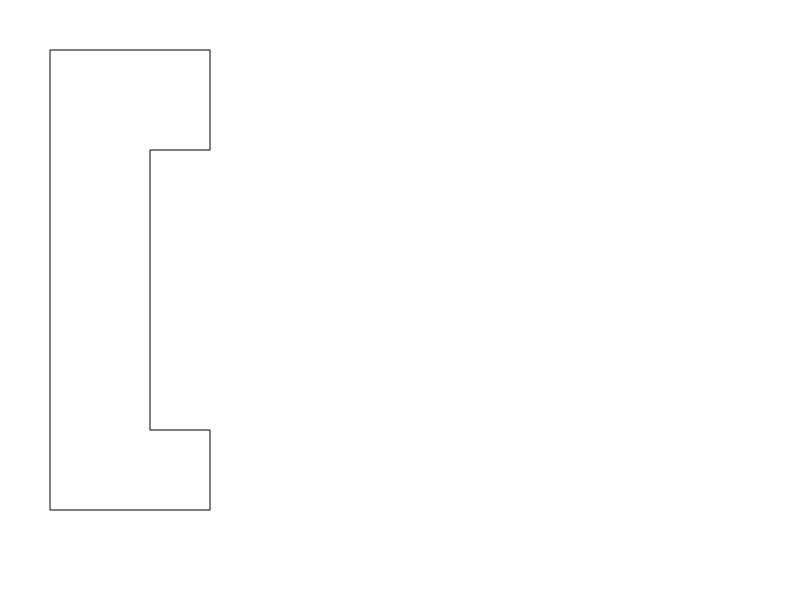

In [3]:
"""
Extinguisher.ipynb
TODO:
- Get floor definition from Revit
- Add Obstacles
- Add Doors (extinguisher to be closest to access points)
"""
__author__ = "Bob YX Lee"
import sys 
import drawsvg as dw
from copy import deepcopy

sys.path.append("./packages")

from geom.Line2D import Line2D

MM = 20

floor = [
    [[0,0], [4 * MM, 0]]
    ,[[4*MM, 0], [8*MM, 0]]
    ,[[8*MM, 0], [8*MM, 5*MM]]
    ,[[8*MM, 5*MM], [5*MM, 5*MM]]
    ,[[5*MM, 5*MM], [5*MM, 19*MM]]
    ,[[5*MM, 19*MM], [8*MM, 19*MM]]
    ,[[8*MM, 19*MM], [8*MM, 23*MM]]
    ,[[8*MM, 23*MM], [0, 23*MM]]
    ,[[0, 23*MM], [0, 0]]
]

floor_lines = []

d = dw.Drawing(800, 600, origin = (-50, -50), id_prefix='pic')
for l in floor:
    line = dw.Line(l[0][0], l[0][1], l[1][0], l[1][1], stroke='black')
    floor_lines.append(Line2D(l[0], l[1]))
    d.append(line)
    pass
d

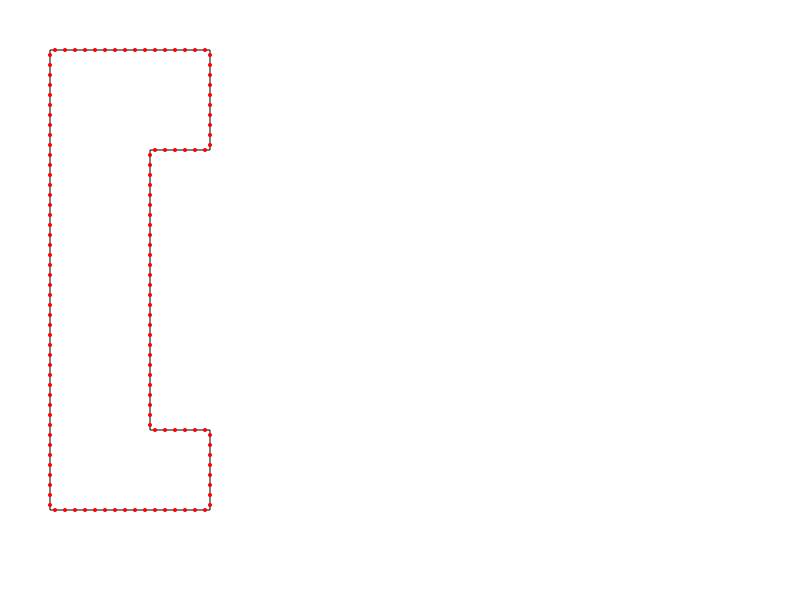

In [5]:
# Split into midpoints
floor_mids = []
div_len = 0.5 * MM
for l in floor_lines:
    divs = l.divideByLength(div_len)
    floor_mids.extend([s.mid for s in divs])

d2 = deepcopy(d)

# Show possible extinguisher placements

for m in floor_mids:
    d2.append(dw.Circle(m[0], m[1], 2, fill='red'))
d2

<!DOCTYPE html>
<head>
<meta charset="utf-8">
</head>
<body>
<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink"
     width="800" height="600" viewBox="-50 -50 800 600">
<defs>
</defs>
<path d="M0,0 L80,0" stroke="black" />
<path d="M80,0 L160,0" stroke="black" />
<path d="M160,0 L160,100" stroke="black" />
<path d="M160,100 L100,100" stroke="black" />
<path d="M100,100 L100,380" stroke="black" />
<path d="M100,380 L160,380" stroke="black" />
<path d="M160,380 L160,460" stroke="black" />
<path d="M160,460 L0,460" stroke="black" />
<path d="M0,460 L0,0" stroke="black" />
<circle cx="5.0" cy="0.0" r="300" fill="yellow" fill-opacity="0.5" />
<circle cx="5.0" cy="0.0" r="2" fill="red" />
</svg>
</body>
</html>



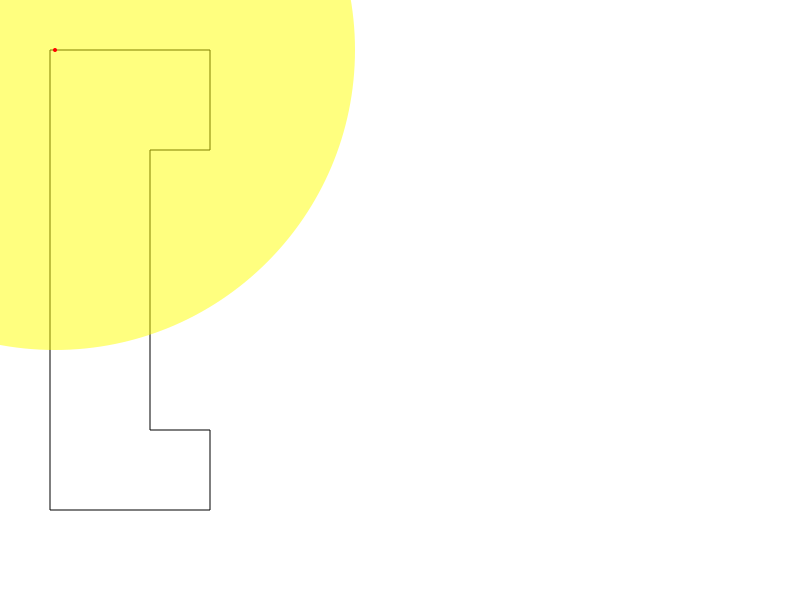

In [18]:
"""
PASS 1
TODO:
- Create iteration algorithm
"""
# Iterate through all possible combinations until boolean difference is 0
d3 = deepcopy(d)

def drawCoverage(d, pt):
    d.append(dw.Circle(pt[0], pt[1], 15*MM, fill='yellow', fill_opacity=0.5))
    d.append(dw.Circle(pt[0], pt[1], 2, fill='red'))
    pass

tp = floor_mids[0]
drawCoverage(d3, tp)

d3

In [46]:
"""
PASS 2
- Make sure fire-route server is on!
- [x] Convert svg xml into raw svg string
- [x] Send to fire-route
- [ ] Parse the network into NetworkX
"""
import re
import requests
FIRE_ROUTE = "http://localhost:41414/mat"
svg_xml = d.as_svg()
paths = re.findall('(?<=d\=\")(.*)(?=\"\sstroke)', svg_xml)

poly_path = []
for i, p in enumerate(paths):
    if i == 0:
        pmod = p[0] + " " + p[1:]
    if i > 0:
        pmod = re.findall('\s(.*)', p)[0]
    pmod = pmod.replace(",", " ")
    poly_path.append(pmod)
    
svg_str =" ".join(poly_path)
res = requests.post(FIRE_ROUTE, json = {"svg": svg_str})
#print(res.json())

{'status': 'success', 'out': {'nodes': [{'id': 0, 'x': 58.57864376269049, 'y': 58.5786437626905}, {'id': 1, 'x': 58.57864376269049, 'y': 58.5786437626905}, {'id': 2, 'x': 56.885528564453125, 'y': 62.890625}, {'id': 3, 'x': 55.616485595703125, 'y': 66.484375}, {'id': 4, 'x': 54.476593017578125, 'y': 70.078125}, {'id': 5, 'x': 53.58983848622454, 'y': 73.20508075688774}, {'id': 6, 'x': 52.584259033203125, 'y': 77.265625}, {'id': 7, 'x': 51.831817626953125, 'y': 80.859375}, {'id': 8, 'x': 50.866619006049966, 'y': 86.83475024126041}, {'id': 9, 'x': 50.5157470703125, 'y': 89.84375}, {'id': 10, 'x': 50.21533203125, 'y': 93.4375}, {'id': 11, 'x': 50.0440673828125, 'y': 97.03125}, {'id': 12, 'x': 50, 'y': 100}, {'id': 13, 'x': 50, 'y': 100.625}, {'id': 14, 'x': 50, 'y': 101.09375}, {'id': 15, 'x': 50, 'y': 102.1875}, {'id': 16, 'x': 50, 'y': 102.421875}, {'id': 17, 'x': 50, 'y': 103.28125}, {'id': 18, 'x': 50, 'y': 104.21875}, {'id': 19, 'x': 50, 'y': 104.375}, {'id': 20, 'x': 50, 'y': 105.4687